# YJN2: deck

Saang Bum Kim <br>
2020-07-01 17:50

In [ ]:
function [model,sb] = cfd_200915(varargin)
%
% [model,sb] = rib_200915(varargin)
%
% Model exported on Sep 16 2020, 18:03 by COMSOL 5.5.0.359.

In [1]:
% !comsol mphserver -silent &

[1] 21693



In [1]:
%
%%  PART 0.     Opening
%
% fclose all; close all
% clc
% clear all
tcomp = tic;
telap = toc(tcomp);

s_dir = 'git/openfoam_seo/wtt/yjn2/deck/';

p_comsol = 2036;
seo_init

id_f = 1;
% id_sv = true;
id_sv = false;
% id_pl = true;
id_pl = false;


MATLAB is now connected to a COMSOL Multiphysics Server at localhost:2036

Run the commands below to access the COMSOL ModelUtil commands:
import com.comsol.model.util.*



C = 

  struct with fields:

    DLM: [1.1742 1.9690 -0.7302 1.1869 1.9696 -0.7301]


C = 

  struct with fields:

    DLM: [0.8682 -1.5477 -0.3436 0.8677 -1.5474 -0.3443]



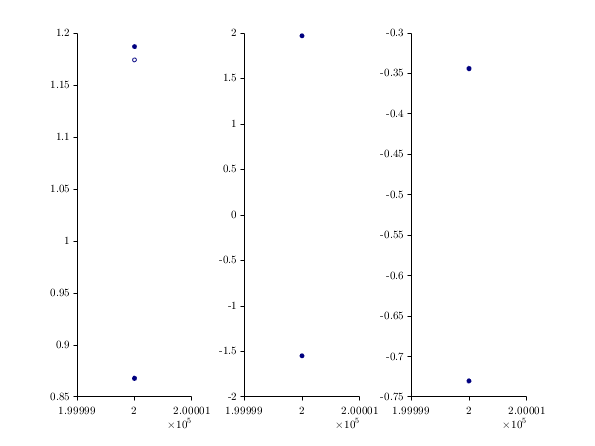

In [65]:
model = mphload('deck_upper_a000_turbulent_Re200000.mph');
C = s_cfd_comsol_DLM(model, sb, 'spf', 'dset1', 1)
C = s_cfd_comsol_DLM2(model, sb, 'spf2', 'dset2', 1)


C2 = 

  struct with fields:

    DLM: [1.2159 2.0390 -0.7830 1.2291 2.0397 -0.7829]


C2 = 

  struct with fields:

    DLM: [0.7554 -1.0241 -0.1339 0.7551 -1.0235 -0.1352]



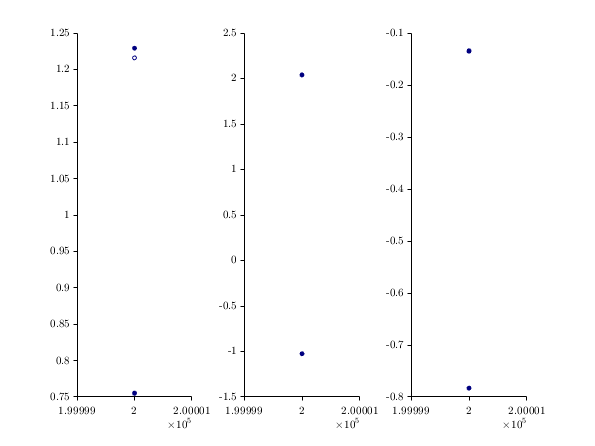

In [77]:
model = mphload('deck_lower_a000_turbulent_Re200000.mph');
C2 = s_cfd_comsol_DLM(model, sb, 'spf', 'dset1', 1)
C2 = s_cfd_comsol_DLM2(model, sb, 'spf2', 'dset2', 1)

# Pre

In [ ]:
clear res
res.Re_pool = [150 1000 10000 100000 200000];
res.geo(1).s_geo = 'upper';
res.geo(2).s_geo = 'lower';

# Upper

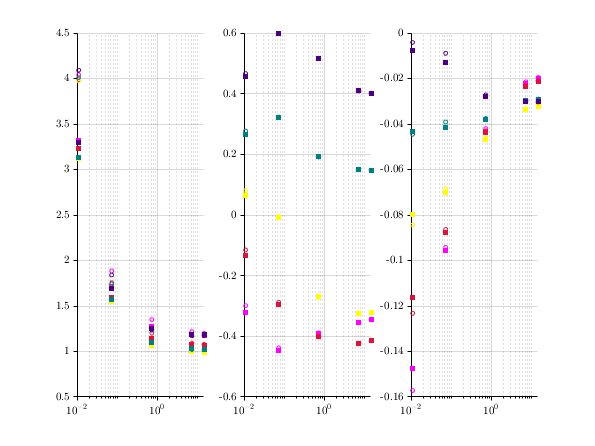

In [86]:
id_geo = 1;
res.geo(id_geo).al_p = [0 2.5 -2.5 5.0 -5.0];
res.geo(id_geo).s_al = {'000', 'm25', 'p25', 'm50', 'p50'};

res.geo(id_geo).s_c{5} = rgb('Magenta');
res.geo(id_geo).s_c{3} = rgb('Crimson');
res.geo(id_geo).s_c{1} = rgb('Yellow');
res.geo(id_geo).s_c{2} = rgb('Teal');
res.geo(id_geo).s_c{4} = rgb('Indigo');


id_pause = true;
figure(1)
clf

for ll = [5 3 1 2 4]
for ii = 1:5
    res.geo(id_geo).sb(ll).Re(ii) = res.Re_pool(ii);
    load(sprintf('deck_%s_a%s_turbulent_SST_Re%d', ...
        res.geo(id_geo).s_geo, res.geo(id_geo).s_al{ll}, res.Re_pool(ii)));

res.geo(id_geo).sb(ll).BD(ii,1:2) = [sb.B,sb.D];
% res.geo(id_geo).sb(ll).res(ii,1:6) = sb.res(ii).C.DLM(1:6);
sc = [1 sb.D/sb.B (sb.D/sb.B)^2];
res.geo(id_geo).sb(ll).res(ii,1:6) = sb.res(ii).C.DLM(1:6)*diag([sc sc]);


    for jj=1:3
        subplot(1,3,jj)
        semilogx(sb.U(res.geo(id_geo).sb(ll).Re(ii)), ...
            res.geo(id_geo).sb(ll).res(ii,jj), ...
            'o', 'Color',res.geo(id_geo).s_c{ll}, 'MarkerSize', 6-3)
            % 'Color',rgb('Navy'), 'MarkerSize', res.geo(id_geo).sb(.s_mk{2})
    end
    if id_pause
        gcfG;gcfH;gcfLFont;gcfS;%gcfP
        id_pause = false;
    end
    for jj=1:3
        subplot(1,3,jj)
        h = semilogx(sb.U(res.geo(id_geo).sb(ll).Re(ii)), ...
            res.geo(id_geo).sb(ll).res(ii,jj+3), ...
            's', 'Color',res.geo(id_geo).s_c{ll}, 'MarkerSize', 6-2);
        h.MarkerFaceColor = h.Color;
    end
end
end

In [88]:
sb.geo


ans = 

  struct with fields:

     id: 1
    x_c: 157.3330
      B: 19.9592
    y_c: 1.6570
      D: 4.0660



# Lower

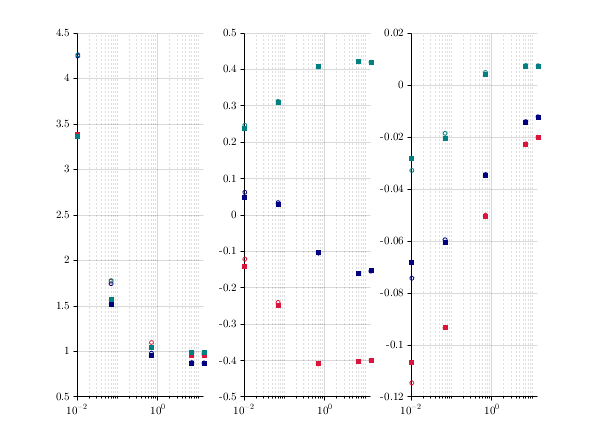

In [89]:
id_geo = 2;
res.geo(id_geo).al_p = [0 2.5 -2.5];
res.geo(id_geo).s_al = {'000', 'm25', 'p25'};

res.geo(id_geo).s_c{1} = rgb('Navy');
res.geo(id_geo).s_c{2} = rgb('Teal');
res.geo(id_geo).s_c{3} = rgb('Crimson');


id_pause = true;
figure(1)
clf

for ll = [3 1 2]
for ii = 1:5
    res.geo(id_geo).sb(ll).Re(ii) = res.Re_pool(ii);
    load(sprintf('deck_%s_a%s_turbulent_SST_Re%d', ...
        res.geo(id_geo).s_geo, res.geo(id_geo).s_al{ll}, res.Re_pool(ii)));

res.geo(id_geo).sb(ll).BD(ii,1:2) = [sb.B,sb.D];
% res.geo(id_geo).sb(ll).res(ii,1:6) = sb.res(ii).C.DLM(1:6);
sc2 = [1 sb.D/sb.B (sb.D/sb.B)^2];
res.geo(id_geo).sb(ll).res(ii,1:6) = sb.res(ii).C.DLM(1:6)*diag([sc2 sc2]);

    for jj=1:3
        subplot(1,3,jj)
        semilogx(sb.U(res.geo(id_geo).sb(ll).Re(ii)), ...
            res.geo(id_geo).sb(ll).res(ii,jj), ...
            'o', 'Color',res.geo(id_geo).s_c{ll}, 'MarkerSize', 6-3)
            % 'Color',rgb('Navy'), 'MarkerSize', res.geo(id_geo).sb(.s_mk{2})
    end
    if id_pause
        gcfG;gcfH;gcfLFont;gcfS;%gcfP
        id_pause = false;
    end
    for jj=1:3
        subplot(1,3,jj)
        h = semilogx(sb.U(res.geo(id_geo).sb(ll).Re(ii)), ...
            res.geo(id_geo).sb(ll).res(ii,jj+3), ...
            's', 'Color',res.geo(id_geo).s_c{ll}, 'MarkerSize', 6-2);
        h.MarkerFaceColor = h.Color;
    end
end
end

In [90]:
sb.geo


ans = 

  struct with fields:

     id: 2
    x_c: 157.1274
      B: 20.8893
    y_c: -20.9289
      D: 3.9264



# C_DLM


C_DLM1 =

    0.2402   -0.3452   -0.0199
    0.2169   -0.4147   -0.0213
    0.2024   -0.3226   -0.0322
    0.2092    0.1476   -0.0291
    0.2418    0.4012   -0.0303


ans =

    0.1769   -0.3153   -0.0143    0.1768   -0.3152   -0.0143



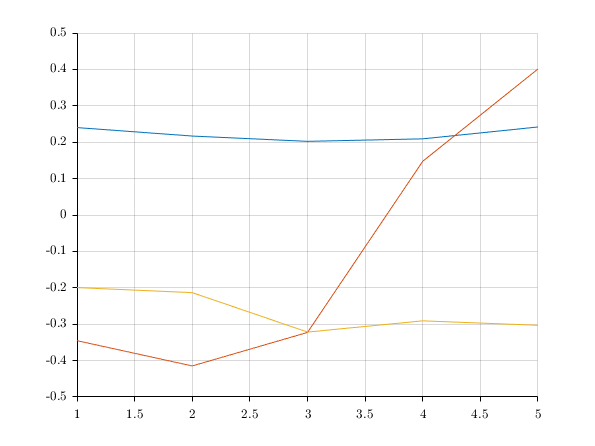

In [83]:
% [res.geo(1).sb(3).res(5,4:6)
C_DLM1 = ...
[res.geo(1).sb(5).res(5,4:6)
res.geo(1).sb(3).res(5,4:6)
res.geo(1).sb(1).res(5,4:6)
res.geo(1).sb(2).res(5,4:6)
res.geo(1).sb(4).res(5,4:6)]*diag([sc(2) 1 1])
% res.geo(1).sb(4).res(5,4:6)]%*diag([1 sb.D/sb.B sb.D^2/sb.B^2]) ...
% res.geo(1).sb(2).res(5,4:6)]%*diag([1 sb.D/sb.B sb.D^2/sb.B^2])
plot(C_DLM1*diag([1 1 10]))
C.DLM*diag([sc(2) sc(2:3) sc(2) sc(2:3)])
gcfG;gcfH;gcfLFont;gcfS;%gcfP


C_DLM2 =

    0.1800   -0.3988   -0.0203
    0.1634   -0.1536   -0.0125
    0.1865    0.4199    0.0072


ans =

    0.1420   -0.1925   -0.0047    0.1419   -0.1924   -0.0048



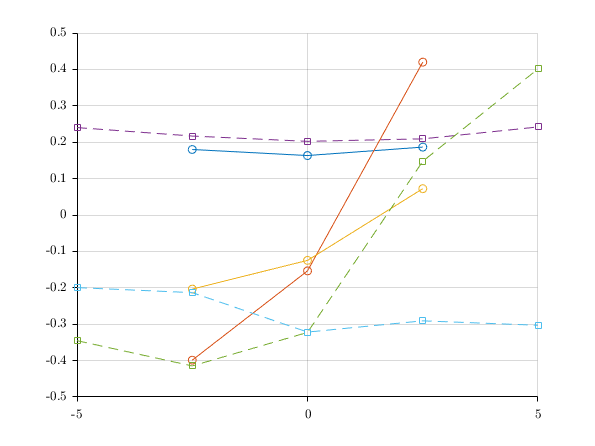

In [85]:
C_DLM2 = [res.geo(2).sb(3).res(5,4:6)
res.geo(2).sb(1).res(5,4:6)
res.geo(2).sb(2).res(5,4:6)]*diag([sc2(2) 1 1])
% res.geo(2).sb(2).res(5,4:6)]%*diag([1 sb.D/sb.B sb.D^2/sb.B^2])

plot([-2.5 0 2.5],C_DLM2*diag([1 1 10]),'o-')
gcfG;gcfH;gcfLFont;gcfS;%gcfP
plot([-5:2.5:5], C_DLM1*diag([1 1 10]),'s--')
% C2.DLM*diag([sc2 sc2])
C2.DLM*diag([sc2([2, 2, 3]) sc2([2 2 3])])

# FINE